# <center> Codebase for generating virtual protacs

In [ ]:
pip install -r requirements.txt

### Import packages 

In [1]:
from codes import *

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Chem import Descriptors, Draw, PandasTools

DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=14
#DrawingOptions.includeAtomNumbers=False

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 800,800

from itertools import groupby


### Read files (source: PROTAC-DB: http://cadd.zju.edu.cn/protacdb/downloads)

In [2]:
e3 = pd.read_csv('data/raw/e3_ligand.csv',usecols=['Compound ID','Smiles','Target','InChI Key'])
whead = pd.read_csv('data/raw/warhead.csv',usecols=['Compound ID','Smiles','InChI Key'])
link = pd.read_csv('data/raw/linker.csv',usecols=['Compound ID','Smiles','InChI Key'])

### Clean smiles and generate unique lists

In [3]:
e3 = remove_salt(e3,'Smiles')
whead = remove_salt(whead,'Smiles')
link = remove_salt(link, 'Smiles')

e3b = [Chem.MolFromSmiles(smi) for smi in e3['Smiles']]
e3b = list(set([Chem.MolToSmiles(mol) for mol in e3b]))

wh = [Chem.MolFromSmiles(smi) for smi in whead['Smiles']]
wh = list(set([Chem.MolToSmiles(mol) for mol in wh]))

lin = [Chem.MolFromSmiles(smi) for smi in link['Smiles']]
lin = list(set([Chem.MolToSmiles(mol) for mol in lin]))

### Generate virtual PROTACS

In [12]:
linker_list = lin[0:20]
e3b_list = e3b[0:20]
wh_list = wh[0:20]

final_df = pd.DataFrame()
for i,l in enumerate(linker_list):
    
    #keep track of linkers
    print('Linker',i+1)
    for j,e in enumerate(e3b_list):
   
        for k,w in enumerate(wh_list):
          
            enum_ptac = Generate_Protacs(l,e,w)
            
            if not enum_ptac.empty:
                final_df = pd.concat([final_df,enum_ptac])

Linker 1
Linker 2
Linker 3
Linker 4
Linker 5


In [ ]:
len(final_df)

### Save to file

In [10]:
final_df.to_csv('data/output/protac_enum.csv')

### Add PROTAC structure to dataframe

In [14]:
PandasTools.AddMoleculeColumnToFrame(final_df, "protac")

,protac,e3binder,warhead,linker,ROMol
0,Cc1c(Cc2ccc(F)cc2)c(C~OCCCc2cn(CCOCCOCCCCOc3cc...,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C)c1Cc1ccc(F)cc1,CCOCCOCCn1cc(CCCO)nn1,
1,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C~OCCCc2cn(CC...,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C)c1Cc1ccc(F)cc1,CCOCCOCCn1cc(CCCO)nn1,
2,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](CCCOCCOCCn2cc(C...,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C)c1Cc1ccc(F)cc1,CCOCCOCCn1cc(CCCO)nn1,
3,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](CCCOCCOCCn2cc(C...,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C)c1Cc1ccc(F)cc1,CCOCCOCCn1cc(CCCO)nn1,
4,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,Cc1nn(-c2ccc(C#N)c(C(F)(F)F)c2)c(C)c1Cc1ccc(F)cc1,CCOCCOCCn1cc(CCCO)nn1,
...,...,...,...,...,...
43,CC(=O)Nc1ccc(C(=O)Nc2ccccc2N~NCCCCCCCNC(=O)CO~...,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[...,CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1,NCCCCCCCNC(=O)CO,
44,CNC(=O)C[C@@H](c1ccc(-c2scnc2C)cc1)N(~OCC(=O)N...,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[...,CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1,NCCCCCCCNC(=O)CO,
45,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O~OCC(=O)NC...,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[...,CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1,NCCCCCCCNC(=O)CO,
46,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[...,CNC(=O)C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[...,CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1,NCCCCCCCNC(=O)CO,

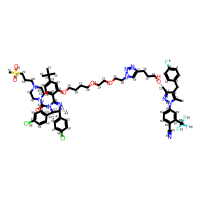
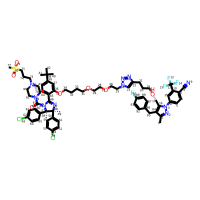
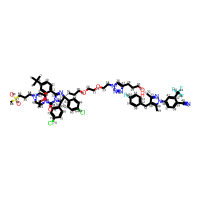
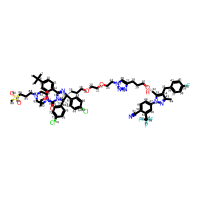
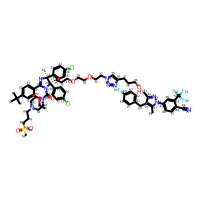
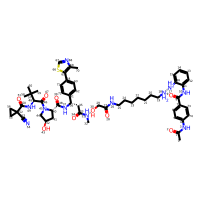
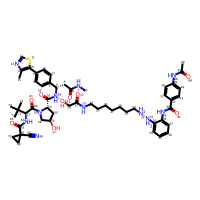
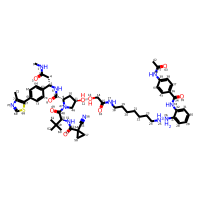
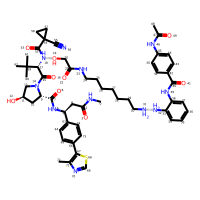
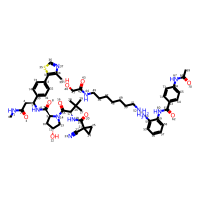

In [15]:
final_df

### Export dataframe with PROTAC structures as images (Takes longer, so export is only for subset)

In [9]:
subset_df = final_df[0:500]

subset_df['protac image'] = [Chem.MolFromSmiles(s) for s in subset_df['protac']]

PandasTools.SaveXlsxFromFrame(subset_df, 'data/output/protac_enum_withStructure_500.xlsx', molCol='protac image')

C:\Users\reagon.karki\AppData\Local\Temp\ipykernel_10736\4089484144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['protac image'] = [Chem.MolFromSmiles(s) for s in subset_df['protac']]
